In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flood-prediction-factors/flood.csv
/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
data_set = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
data_set

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [3]:
data_set.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [4]:
data_set_target= data_set.drop(['FloodProbability'],axis=1)
data_set_target

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0,5,8,5,8,6,4,4,3,3,...,2,5,3,3,5,4,7,5,7,3
1,1,6,7,4,4,8,8,3,5,4,...,9,7,2,0,3,5,3,3,4,3
2,2,6,5,6,7,3,7,1,5,4,...,6,7,3,7,5,6,8,2,3,3
3,3,3,4,6,5,4,8,4,7,6,...,5,2,4,7,4,4,6,5,7,5
4,4,5,3,2,6,4,4,3,3,3,...,5,2,2,6,6,4,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,3,7,8,7,2,2,1,4,6,4
1117953,1117953,2,2,4,3,9,5,8,1,3,...,5,9,4,4,3,7,4,9,4,5
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,5,6,5,5,2,4
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,6,8,5,3,4,6,7,6,4


In [5]:
#dependentValue
y= data_set['FloodProbability']
y.head()

0    0.445
1    0.450
2    0.530
3    0.535
4    0.415
Name: FloodProbability, dtype: float64

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_set_target,y,test_size=0.2,random_state = 42)

In [7]:
#StandardScaler
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
type(X_train)

numpy.ndarray

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([4.88752658e-07, 1.15485238e-02, 1.18167691e-02, 1.17322921e-02,
       1.16465999e-02, 1.17837348e-02, 1.16405593e-02, 1.17722307e-02,
       1.16523142e-02, 1.16557728e-02, 1.17657449e-02, 1.17158294e-02,
       1.16678072e-02, 1.18465500e-02, 1.17279146e-02, 1.17655119e-02,
       1.15984230e-02, 1.17914511e-02, 1.16611869e-02, 1.16758510e-02,
       1.17977812e-02])

In [9]:
y_pred=reg.predict(X_test)

In [10]:
y_pred

array([0.53400545, 0.5848778 , 0.52256361, ..., 0.53376573, 0.49427481,
       0.50587922])

Mean absolute error 0.01579833319318588
R2 Score 0.8448736540962928


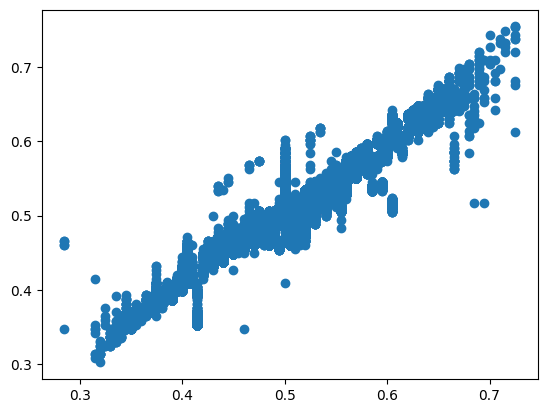

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [12]:
test=pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

In [13]:
test_pred=reg.predict(test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
submission=test[['id']]

In [15]:
submission

,id
0,1117957
1,1117958
2,1117959
3,1117960
4,1117961
...,...
745300,1863257
745301,1863258
745302,1863259
745303,1863260


In [16]:
submission['FloodProbability']=test_pred

/tmp/ipykernel_18/1831397702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['FloodProbability']=test_pred


In [17]:
submission

,id,FloodProbability
0,1117957,2.351754
1,1117958,2.105397
2,1117959,2.104956
3,1117960,2.128567
4,1117961,2.128318
...,...,...
745300,1863257,2.515586
745301,1863258,2.456967
745302,1863259,2.820683
745303,1863260,2.669524


In [18]:
submission.to_csv('submission.csv',index=None)

In [19]:
pd.read_csv('/kaggle/working/submission.csv')

,id,FloodProbability
0,1117957,2.351754
1,1117958,2.105397
2,1117959,2.104956
3,1117960,2.128567
4,1117961,2.128318
...,...,...
745300,1863257,2.515586
745301,1863258,2.456967
745302,1863259,2.820683
745303,1863260,2.669524
